# This is a short verison of DMA, to avoid annoying imcompataible appearance. 

In [1]:
# This is only here to direct python to find where the 
# Mark Ruihe change 
import sys  ; import pybamm; import os
str_path_0 = os.path.abspath(
    os.path.join(pybamm.__path__[0],'..'))
str_path_1 = os.path.abspath(
    os.path.join(str_path_0,"wip\\Niall_DMA\\Data Analysis Functions"))
sys.path.append(str_path_1) 

import warnings
warnings.simplefilter('ignore', FutureWarning)

# Standard python libraries required for this to work
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button
from matplotlib.lines import Line2D
import numpy as np
from scipy import optimize

# Some modules I wrote which contain functions used for data processing/analysis
import NDK_functions_Biologic_loading as bl
import NDK_functions_Degradation_Modes as dm
import NDK_functions_Degradation_Modes_composites as dmc

# To graph the results within the Notebook
# %matplotlib notebook

In [3]:
# Load reference 1/2 cell datasets for each electrode/component (1 for PE, 2 for NE)
PE_OCV = pd.read_csv('Example Data/Reference half-cell data/LGM50_NMC_PE_lithiation_OCV_v2.csv', index_col=0)
NE_LGM50_OCV = pd.read_csv('Example Data/Reference half-cell data/LGM50_SiGr_NE_delithiation_OCV.csv', index_col=0)
NE_Gr_OCV = pd.read_csv('Example Data/Reference half-cell data/Gr_NE_OCV_delithiation.csv', index_col=0)
NE_Si_OCV = pd.read_csv('Example Data/Reference half-cell data/Si_NE_OCV_delithiation_NEW(pure-Si(100mV)cycle2).csv', index_col=0)

In [13]:
# Load full cell datasets to be analysed (a BoL dataset and some aged cell datasets)
AgeDataPath = "D:/OneDrive - Imperial College London/Degradation Tests/"
Path_Exp   = "Expt 3 - Cathode Degradation and Li-Plating/Performance Checks/"
cellBOL = bl.combo_function_fast(
    AgeDataPath+Path_Exp+  "BoL/Slow/" +   #  "RPT1/"
    "NDK - LG M50 deg - exp 3 - rig 1 - 10degC - cell A - BoL (slow)_01_MB_CD6.mpt"
    #'NDK - LG M50 deg - exp 3 - rig 1 - 10degC - cell A - RPT1_01_MB_CB6.mpt'
    )
cell_RPT_1 = bl.combo_function_fast(
    AgeDataPath+Path_Exp+    "RPT1/" +
    'NDK - LG M50 deg - exp 3 - rig 1 - 10degC - cell A - RPT1_01_MB_CB6.mpt'
    )
cell_RPT_6 = bl.combo_function_fast(
    AgeDataPath+Path_Exp+    "RPT6/" +
    'NDK - LG M50 deg - exp 3 - rig 1 - 10degC - cell A - RPT6_01_MB_CB6.mpt'
    )
cell_RPT_10 = bl.combo_function_fast(
    AgeDataPath+Path_Exp+    "RPT10/" +
    'NDK - LG M50 deg - exp 3 - rig 1 - 10degC - cell A - RPT10_01_MB_CB6.mpt'
    )

In [14]:
# combine the full cell data into a list
cellData = [cellBOL, cell_RPT_1, cell_RPT_6,cell_RPT_10]

<AxesSubplot:xlabel='Time (s)'>

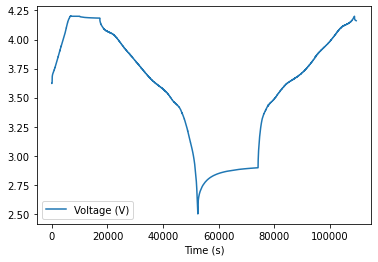

In [21]:
# Show some of the data (not necessary, but useful to check it has loaded ok)
cellBOL.plot('Time (s)', 'Voltage (V)')

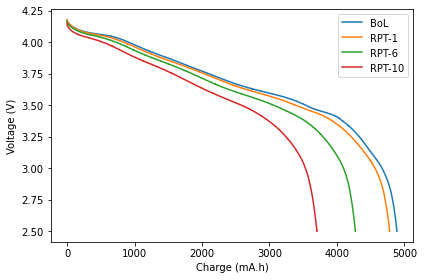

In [20]:
# Plot of the discharge voltage curves for the 3 datasets being analysed
fig_V_curves, ax = plt.subplots()
Str_Labels = ['BoL', 'RPT-1', 'RPT-6','RPT-10']
for cell, label_name in zip(cellData,Str_Labels ):
    data_to_plot = cell[cell['Current (mA)'] < 0]
    data_to_plot.plot('Charge (mA.h)', 'Voltage (V)', ax=ax, label=label_name)

ax.set_ylabel('Voltage (V)')

fig_V_curves.tight_layout()

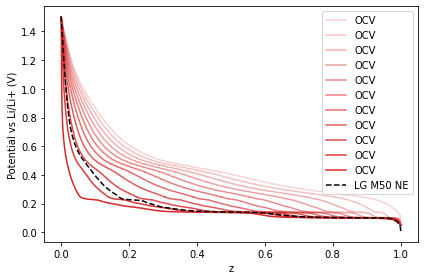

In [23]:
# The functions used in the next couple of boxes do not need to be used when analysing a full-cell curve
Gr_comp_format, Si_comp_format, V_range_format = dmc.format_el_component_data1(
    NE_Gr_OCV, NE_Si_OCV)
calculated_curves = [
    dmc.calc_electrode_curve(
    Gr_comp_format, Si_comp_format, 
    Gr_fraction, V_range_format) 
    for Gr_fraction in np.arange(0,1.1,0.1)]

fig_calc_composite_curves, ax = plt.subplots()

for comp_curve, frac in zip(calculated_curves, np.arange(0,1.1,0.1)):
    comp_curve.plot(ax=ax, c='C3', alpha=(frac*0.8 + 0.2), label=f'Gr{frac}')
    
NE_LGM50_OCV.plot('z', 'OCV', ax=ax, c='k', ls='--', label='LG M50 NE')

ax.set_ylabel('Potential vs Li/Li+ (V)')

fig_calc_composite_curves.tight_layout()

0.85 0.15000000000000002
0.9349999999999999 0.06500000000000006
0.8698991209624449 0.13010087903755507
0.9568890330586894 0.04311096694131056
0.8768838975195662 0.12311610248043381
0.8716453151017253 0.12835468489827473
0.870335669497265 0.12966433050273496
0.8700082580961499 0.1299917419038501
0.8699264052458712 0.13007359475412883
0.9569190457704583 0.043080954229541724
0.8699332256014451 0.13006677439855485
0.9569265481615896 0.04307345183841038
0.8699400457782055 0.1300599542217945
0.9569340503560261 0.04306594964397392
0.8699536857740989 0.13004631422590107
0.8699434557771789 0.1300565442228211
0.9569378013548968 0.04306219864510319
0.8699502756857194 0.13004972431428063
0.869945160754314 0.13005483924568595
0.9569396768297455 0.043060323170254544
0.8699468657202735 0.13005313427972653
0.8699455869958039 0.13005441300419607
0.9569401456953843 0.043059854304615675
0.8699456935560018 0.13005430644399818
0.8699456136358534 0.13005438636414657
0.8699455936558163 0.13005440634418375


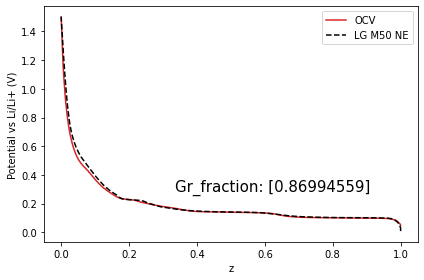

In [24]:
fitted_Gr_fraction, _ = dmc.composite_fit(NE_Gr_OCV, NE_Si_OCV, NE_LGM50_OCV)

fitted_NE_curve = dmc.calc_electrode_curve(
    Gr_comp_format, Si_comp_format, fitted_Gr_fraction, V_range_format)

fig_fitted_composite_curve, ax = plt.subplots()

fitted_NE_curve.plot(ax=ax, c='C3', label='Fitted Curve')    
NE_LGM50_OCV.plot('z', 'OCV', ax=ax, c='k', ls='--', label='LG M50 NE')

ax.set_ylabel('Potential vs Li/Li+ (V)')
ax.annotate(f'Gr_fraction: {fitted_Gr_fraction}',
            xy=(0.35,0.2), xycoords='axes fraction',
               xytext=(0.35,0.2), textcoords='axes fraction', horizontalalignment='left',verticalalignment='bottom', fontsize=15)


fig_fitted_composite_curve.tight_layout()

In [26]:
# Format some data for the graph below. This is not required for the 'DM_calc' function.
discharge_cellBOL = cellBOL.copy()

discharge_cellBOL = discharge_cellBOL[
    discharge_cellBOL[
    'Current (mA)']<0].loc[
    :, ['Charge (mA.h)', 'Voltage (V)']]
discharge_cellBOL.reset_index(inplace=True, drop=True)
discharge_cellBOL['SOC (%)'] =(
    1 - 
    discharge_cellBOL['Charge (mA.h)']
    /discharge_cellBOL['Charge (mA.h)'].max()   )
# Define initial parameters
init_PE_lo = 0.1
init_NE_lo = 0.01
init_PE_hi = 0.98
init_NE_hi = 0.88

x_values = discharge_cellBOL['SOC (%)']
cell_curve, _, _ = dm.calc_full_cell_OCV_standalone(
    [NE_LGM50_OCV, PE_OCV], x_values, 
    init_PE_lo, init_NE_lo, init_PE_hi, init_NE_hi)
y_values = cell_curve['OCV']

35218


Text(0.35, 0.2, 'Gr_fraction: 0.8771\n Si_fraction: 0.12290000000000001')

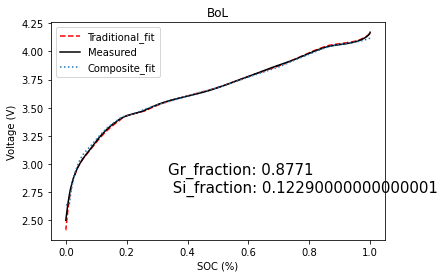

In [27]:
composite_fitted_params, _, _ = dmc.stoich_OCV_fit_multi_comp(
    NE_Gr_OCV, NE_Si_OCV, PE_OCV, discharge_cellBOL)

comp_cell_curve, _, _, _ = dmc.calc_full_cell_OCV_multi_standalone(NE_Gr_OCV, NE_Si_OCV, PE_OCV, discharge_cellBOL['SOC (%)'], *composite_fitted_params)

fitted_Gr_fract = composite_fitted_params[4].round(4)
fitted_Si_fract = 1-fitted_Gr_fract

ax=cell_curve.plot('SOC (%)', 'OCV', label='Traditional_fit', ls='--', c='r')
discharge_cellBOL.plot('SOC (%)', 'Voltage (V)', ax=ax, label='Measured', c='k')
comp_cell_curve.plot('SOC (%)', 'OCV', ax=ax, label='Composite_fit', ls=':')

ax.set_title('BoL')
ax.set_ylabel('Voltage (V)')
ax.annotate(f'Gr_fraction: {fitted_Gr_fract}\n Si_fraction: {fitted_Si_fract}',
            xy=(0.35,0.2), xycoords='axes fraction',
               xytext=(0.35,0.2), textcoords='axes fraction', horizontalalignment='left',verticalalignment='bottom', fontsize=15)

34449


<AxesSubplot:xlabel='SOC (%)'>

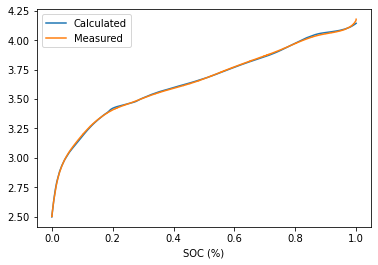

In [30]:
# Format some data for the graph below. This is not required for the 'DM_calc' function.
discharge_cellEOL = cellData[1].copy()

discharge_cellEOL = discharge_cellEOL[discharge_cellEOL['Current (mA)']<0].loc[:, ['Charge (mA.h)', 'Voltage (V)']]
discharge_cellEOL.reset_index(inplace=True, drop=True)
discharge_cellEOL['SOC (%)'] = (
    1 - discharge_cellEOL['Charge (mA.h)']
    /discharge_cellEOL['Charge (mA.h)'].max()  )
OCV_fitted_params_EoL, _, _ = dm.stoich_OCV_fit(
    NE_LGM50_OCV, PE_OCV, discharge_cellEOL)

cell_curve_EoL, _, _ = dm.calc_full_cell_OCV_standalone(
    [NE_LGM50_OCV, PE_OCV], discharge_cellEOL['SOC (%)'], 
    *OCV_fitted_params_EoL)

# ax=cell_curve_EoL.plot('SOC (%)', 'OCV', label='Calculated')
# discharge_cellEOL.plot('SOC (%)', 'Voltage (V)', ax=ax, label='Measured')

Text(0.35, 0.2, 'Gr_fraction: 0.8415\n Si_fraction: 0.15849999999999997')

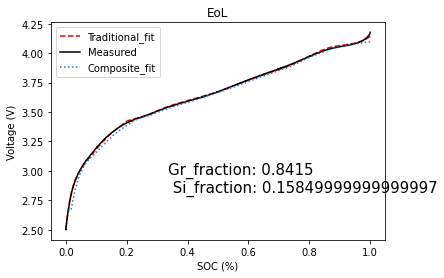

In [31]:
composite_fitted_params_EoL, _, _ = dmc.stoich_OCV_fit_multi_comp(
   NE_Gr_OCV, NE_Si_OCV, PE_OCV, discharge_cellEOL)

comp_cell_curve_EoL, _, _, _ = dmc.calc_full_cell_OCV_multi_standalone(
    NE_Gr_OCV, NE_Si_OCV, PE_OCV, discharge_cellEOL['SOC (%)'], 
    *composite_fitted_params_EoL)

fitted_Gr_fract = composite_fitted_params_EoL[4].round(4)
fitted_Si_fract = 1-fitted_Gr_fract

ax=cell_curve_EoL.plot(
    'SOC (%)', 'OCV', label='Traditional_fit', 
    ls='--', c='r')
discharge_cellEOL.plot(
    'SOC (%)', 'Voltage (V)', 
    ax=ax, label='Measured', c='k')
comp_cell_curve_EoL.plot(
    'SOC (%)', 'OCV', ax=ax, 
    label='Composite_fit', ls=':')

ax.set_title('EoL')
ax.set_ylabel('Voltage (V)')
ax.annotate(
    f'Gr_fraction: {fitted_Gr_fract}\n Si_fraction: {fitted_Si_fract}',
    xy=(0.35,0.2), xycoords='axes fraction',
    xytext=(0.35,0.2), textcoords='axes fraction', 
    horizontalalignment='left',
    verticalalignment='bottom', fontsize=15)

In [32]:
# Analayse the 3 datasets using the DMA function
DM_data, stoic_data, error_data = dmc.DM_calc_multi_comp_long(
    NE_Gr_OCV, NE_Si_OCV, PE_OCV, cellData[0], cellData[1:])

0
1
2


In [35]:
# Inspect one of the output DataFrames
error_data.head()

,RMSE (V)
0,0.014081
1,0.017384
2,0.014564
3,0.010813


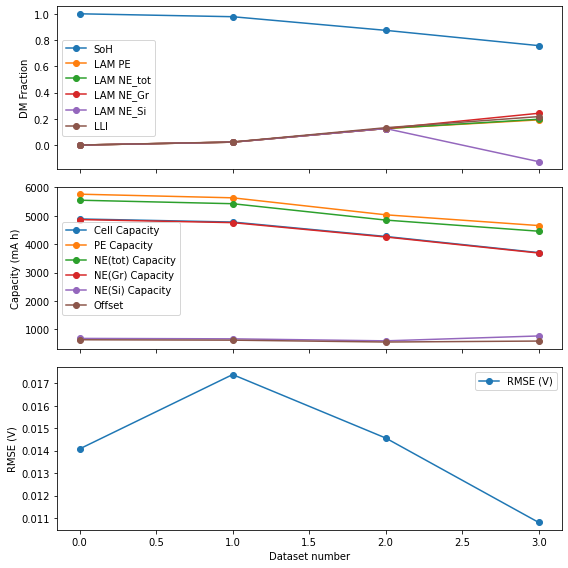

In [34]:
# Plot the output data from the DMA function
fig_DMA_output, ax = plt.subplots(3,1, sharex=True, figsize=(8,8))

DM_data.plot(ax=ax[0], marker='o')
stoic_data.plot(ax=ax[1], marker='o')
error_data.plot(ax=ax[2], marker='o')

ax[0].set_ylabel('DM Fraction')
ax[1].set_ylabel('Capacity (mA h)')
ax[2].set_ylabel('RMSE (V)')
ax[2].set_xlabel('Dataset number')

fig_DMA_output.tight_layout()